### Traffic flow models, Hyperbolic equations

Consider the traffic flow of cars on a highway with only one lane (i.e., overtaking is impossible). Instead of modeling the cars individually, we use the density $\rho(x, t)$ of cars (in vehicles per kilometer, say) in $x \in \mathbb{R}$ at time $t \geq 0$. The number of cars which are in the interval $\left(x_{1}, x_{2}\right)$ at time $t$ is
$$
\int_{x_{1}}^{x_{2}} \rho(x, t) d x
$$

Let $v(x, t)$ denote the velocity of the cars in $x$ at time $t$. The number of cars which pass through $x$ at time $t$ (in unit length) is $\rho(x, t) v(x, t)$. We want to derive an equation for the evolution of the car density. The number of cars in the interval $\left(x_{1}, x_{2}\right)$ changes according to the number of cars which enter or leave this interval (see Figure 1.1):
$$
\frac{d}{d t} \int_{x_{1}}^{x_{2}} \rho(x, t) d x=\rho\left(x_{1}, t\right) v\left(x_{1}, t\right)-\rho\left(x_{2}, t\right) v\left(x_{2}, t\right) .
$$
Integration of this equation with respect to time and assuming that $\rho$ and $v$ are regular functions yields
$$
\begin{aligned}
\int_{t_{1}}^{t_{2}} \int_{x_{1}}^{x_{2}} \partial_{t} \rho(x, t) d x d t &=\int_{t_{1}}^{t_{2}}\left(\rho\left(x_{1}, t\right) v\left(x_{1}, t\right)-\rho\left(x_{2}, t\right) v\left(x_{2}, t\right)\right) d x d t \\
&=-\int_{t_{1}}^{t_{2}} \int_{x_{1}}^{x_{2}} \partial_{x}(\rho(x, t) v(x, t)) d x d t
\end{aligned}
$$
Since $x_{1}, x_{2} \in \mathbb{R}, t_{1}, t_{2}>0$ are arbitrary, we conclude
$$
\rho_{t}+(\rho v)_{x}=0, \quad x \in \mathbb{R}, t>0 .
$$

a tailback where the cars are bumper to bumper $\left(\rho=\rho_{\max }\right)$. The simplest model is the linear relation
$$
v(\rho)=v_{\max }\left(1-\frac{\rho}{\rho_{\max }}\right), \quad 0 \leq \rho \leq \rho_{\max }
$$
then 
$$
\rho_{t}+\left[v_{\max } \rho\left(1-\frac{\rho}{\rho_{\max }}\right)\right]_{x}=0, \quad x \in \mathbb{R}, t>0 .
$$


### The Burger's equation

Let $L$ and $\tau$ be a typical length and time, respectively, such that $L / \tau=v_{\max }$. Introducing
$$
y=\frac{x}{L}, \quad s=\frac{t}{\tau}, \quad u=1-\frac{2 \rho}{\rho_{\max }},
$$
we get the inviscid Burgers equation
$$
\begin{aligned}
u_{s}+\left(\frac{u^{2}}{2}\right)_{y} &=0, \quad y \in \mathbb{R}, s>0 \\
u(y, 0) &=u_{0}(y), \quad y \in \mathbb{R}
\end{aligned}
$$
with $u_{0}=1-2 \rho_{0} / \rho_{\max }$. If the highway is empty $(\rho=0)$, we have $u=1$; in a tailback $\left(\rho=\rho_{\max }\right), u=-1$ holds.


Using the method of characteristics one can show that the solution is given by 
$$
u(x(t), t)=u(x(0), 0)=u_{0}\left(x_{0}\right)
$$
where
$$
x=x_{0}+u_{0}\left(x_{0}\right) t, t>0
$$
One needs to solve $x_0 = x_0(x,t)$ to get the solution in explicit form

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
nx = 41
nt = 41
x0 = np.linspace(0,3,nx)
t = np.linspace(0,1,nt)
def uInit(x):
    return np.exp(-(2 *(x - 1))**2)

def charact(x0,t):
    return x0 + uInit(x0)*t


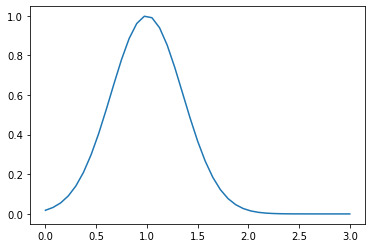

In [3]:
plt.plot(x0,uInit(x0))
plt.show()

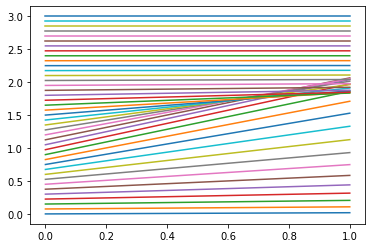

In [4]:
#Plot characteristics
for s in x0:
    plt.plot(t,charact(s,t))

Due to the shock we cannot plot the solution because when the characteristics cross the solution becomes multivalued 

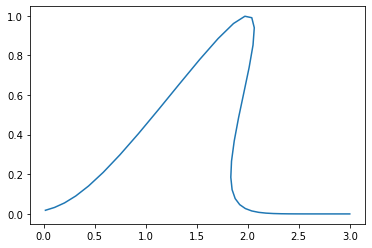

In [5]:
plt.plot(charact(x0,t[40]),uInit(x0))
plt.show()

#### Numerical scheme

$$
u_{j}^{i+1}=u_{j}^{i}-\frac{\Delta t}{\Delta x}\left[\frac{1}{2}\left(u_{j}^{i}\right)^{2}-\frac{1}{2}\left(u_{j-1}^{i}\right)^{2}\right]
$$

In [6]:
nx = 41
x = np.linspace(0,2,nx)
dx = x[1]-x[0]
dt = 0.01
t = np.arange(0,2,dt)

In [7]:
#Initial conditions
def uInit(x, ictype):
    ui = 0*x
    xshift = 1
    #Shock (uL > uR)
    if (ictype == 1):
        uL = 1
        uR = 0
        ui = uR + (uL-uR) * ((x-xshift) <= 0.0)
    #gaussian
    elif (ictype==2):
        ui = np.exp(-2*(x - 1)**2)
    #Piecewise continuous
    elif (ictype==3):
        ui = 0*x + 1
        xpos = ((x>=0) & (x<=1))
        ui[xpos] = 1- x[xpos]
        ui[x>=1] = 0
    return ui

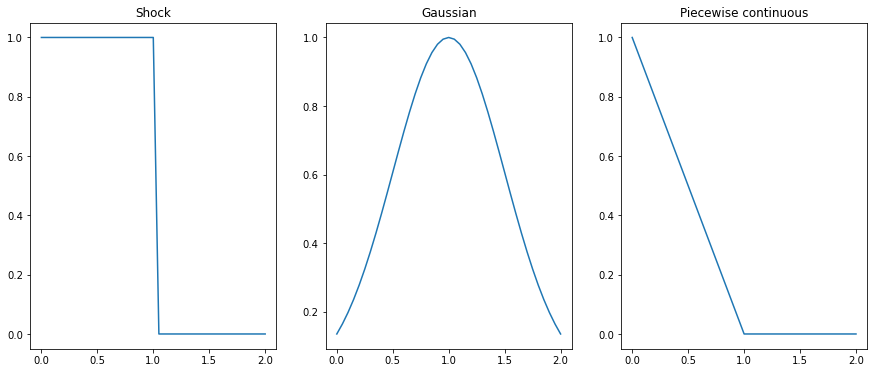

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
ax1.plot(x,uInit(x,1))
ax1.set_title("Shock")
ax2.plot(x,uInit(x,2))
ax2.set_title("Gaussian")
ax3.plot(x,uInit(x,3))
ax3.set_title("Piecewise continuous")
plt.show()

In [9]:
def burger_int(x,init_cond):
    u = np.zeros((len(t),nx))
    u[0,:] = init_cond(x)

    for i in range(0,len(t)-1):
        u[i+1,1:]= u[i,1:] - dt/dx * (1/2) * ((u[i,1:])**2 - (u[i,0:-1])**2)
        u[i+1,0] = u[i,0]
        
    return u

In [10]:
u1 = burger_int(x,lambda x: uInit(x,1))
u2 = burger_int(x,lambda x: uInit(x,2))
u3 = burger_int(x,lambda x: uInit(x,3))

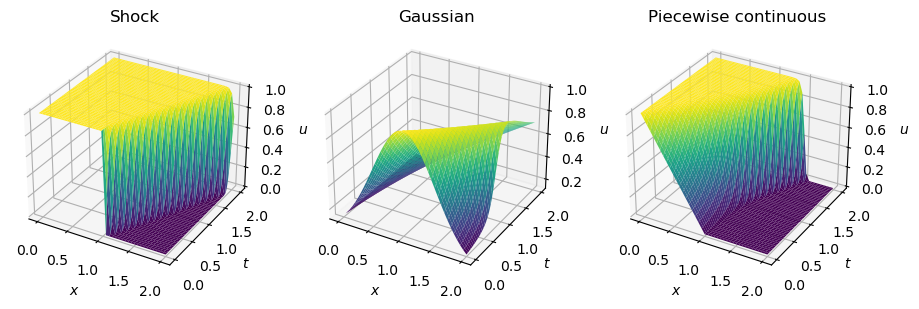

In [11]:
fig = plt.figure(figsize=(11,7), dpi=100)
X,T = np.meshgrid(x,t)
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X,T,u1[:], cmap=cm.viridis)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$t$')
ax1.set_zlabel('$u$')

ax2 = fig.add_subplot(132, projection='3d')
surf = ax2.plot_surface(X,T,u2[:], cmap=cm.viridis)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$t$')
ax2.set_zlabel('$u$')

ax3 = fig.add_subplot(133, projection='3d')
surf = ax3.plot_surface(X,T,u3[:], cmap=cm.viridis)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$t$')
ax3.set_zlabel('$u$')

ax1.set_title("Shock")
ax2.set_title("Gaussian")
ax3.set_title("Piecewise continuous")
plt.show()

#### Plot cross sections

In [12]:
def plot_cross(x,t,u):
    fig, axs = plt.subplots(4,4, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 1, wspace=.19)

    axs = axs.ravel()

    for inum, i in enumerate(np.arange(0,len(t), int(len(t)/16) + 1)):

        axs[inum].plot(x,u[i+1,:]) 
        axs[inum].set_title(f"t= {t[i]}")
        #axs[inum].set_xlim(0,1)
        #axs[inum].set_ylim(-1,1)

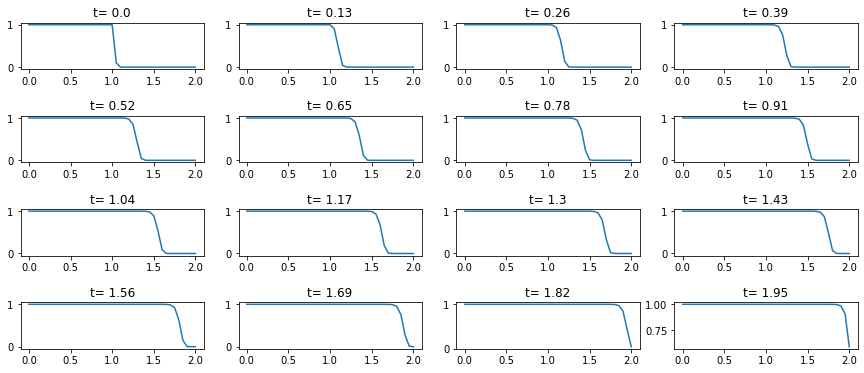

In [13]:
#The shock
plot_cross(x,t,u1)

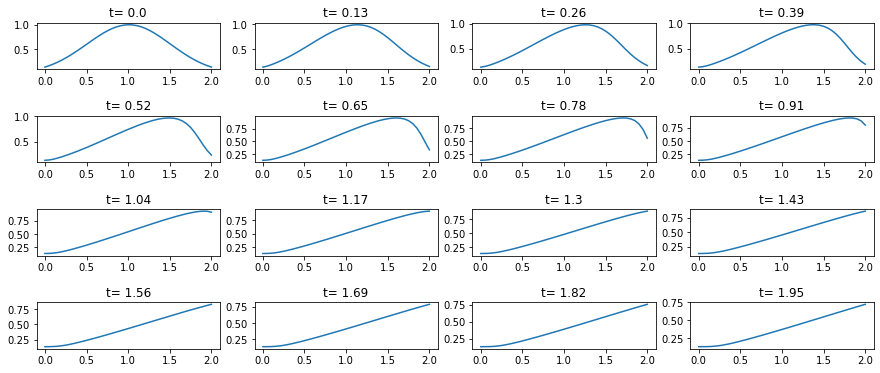

In [14]:
#The gaussian
plot_cross(x,t,u2)

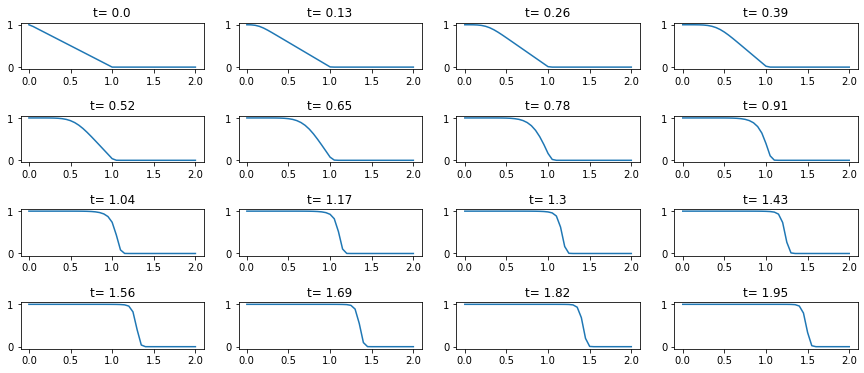

In [15]:
#The Piecewise continuous
plot_cross(x,t,u3)

#### Applications to traffic flow

Let $\rho _{max} = 1$ then $\rho = (1-u)/2$

In [16]:
rho1 = (1-u1)/2
rho2 = (1-u2)/2
rho3 = (1-u3)/2

In this case of the shock is moving to the right and represents the area with higher congestion

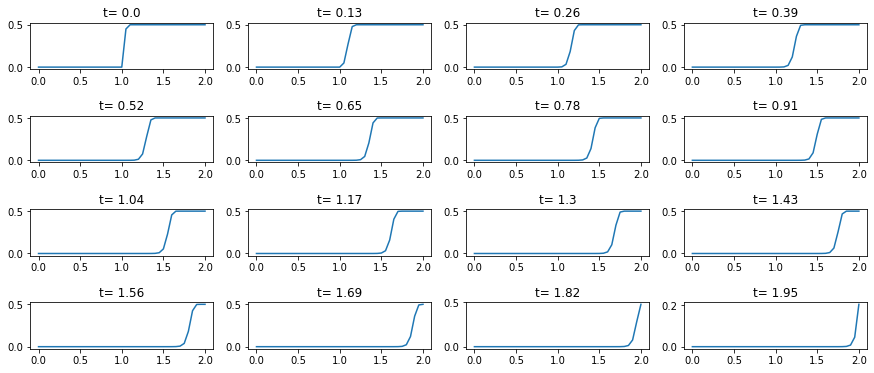

In [17]:
#The shock
plot_cross(x,t,rho1)

The case of the gaussian could represent the case where the road is initially blocked at the two ends. The right end will evemtually have less traffic and the traffic will be supported by the left end

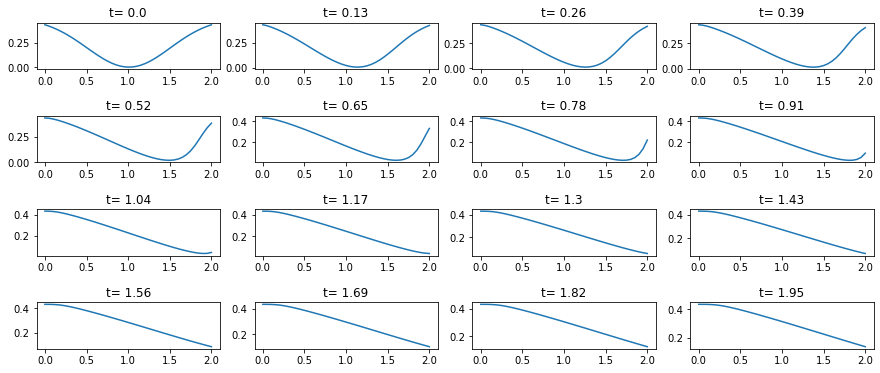

In [18]:
#The gaussian
plot_cross(x,t,rho2)

The last case the situation is similar to the one with the shock but the traffic does not get too bad as fast. It will however turn to a shock in time

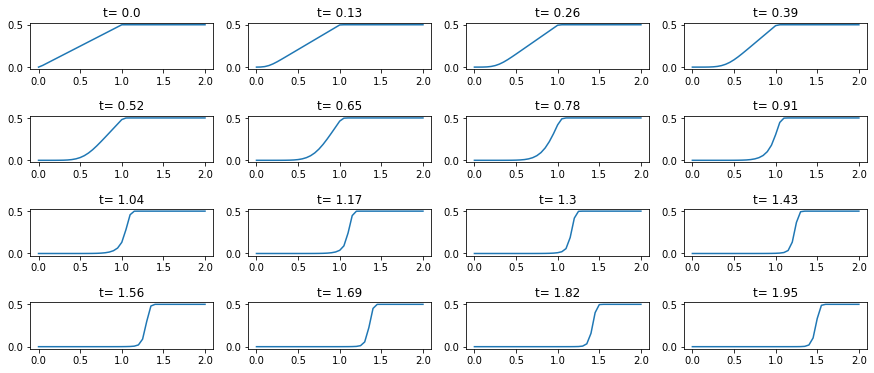

In [19]:
#The Piecewise continuous
plot_cross(x,t,rho3)